 ## IMPORTING THE LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\sathi\\Desktop\\pythondocs")

In [3]:
#Reading the Dataset
df = pd.read_csv('hepatitis_csv.csv')

In [4]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [5]:
df.shape

(155, 20)

In [6]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [8]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


## Checking for Null Values

In [9]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [10]:
missing = df.protime.isnull().sum()

In [11]:
missing/len(df)*100

43.225806451612904

### More than 25% of data is missing from 'protime' variable , so we can remove it.

In [12]:
df = df.drop(['protime'] , axis = 1 )

In [13]:
df.columns
#df.shape

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'histology',
       'class'],
      dtype='object')

### Categorical missing values are filled by Frequently Recurring Item:

In [14]:
df.steroid.value_counts()

True     78
False    76
Name: steroid, dtype: int64

In [15]:
df['steroid'] = df['steroid'].fillna(df.steroid.value_counts().index[0])

In [16]:
df.fatigue.value_counts()

True     100
False     54
Name: fatigue, dtype: int64

In [17]:
df['fatigue'] = df['fatigue'].fillna(df.fatigue.value_counts().index[0])

In [18]:
df.malaise.value_counts()

False    93
True     61
Name: malaise, dtype: int64

In [19]:
df['malaise'] = df['malaise'].fillna(df.malaise.value_counts().index[0])

In [20]:
df.anorexia.value_counts()

False    122
True      32
Name: anorexia, dtype: int64

In [21]:
df['anorexia'] = df['anorexia'].fillna(df.anorexia.value_counts().index[0])

In [22]:
df.liver_big.value_counts()

True     120
False     25
Name: liver_big, dtype: int64

In [23]:
df['liver_big'] = df['liver_big'].fillna(df.liver_big.value_counts().index[0])

In [24]:
df.liver_firm.value_counts()

False    84
True     60
Name: liver_firm, dtype: int64

In [25]:
df['liver_firm'] = df['liver_firm'].fillna(df.liver_firm.value_counts().index[0])

In [26]:
df.spleen_palpable.value_counts()

False    120
True      30
Name: spleen_palpable, dtype: int64

In [27]:
df['spleen_palpable'] = df['spleen_palpable'].fillna(df.spleen_palpable.value_counts().index[0])

In [28]:
df.spiders.value_counts()

False    99
True     51
Name: spiders, dtype: int64

In [29]:
df['spiders'] = df['spiders'].fillna(df.spiders.value_counts().index[0])

In [30]:
df.ascites.value_counts()

False    130
True      20
Name: ascites, dtype: int64

In [31]:
df['ascites'] = df['ascites'].fillna(df.ascites.value_counts().index[0])

In [32]:
df.varices.value_counts()

False    132
True      18
Name: varices, dtype: int64

In [33]:
df['varices'] = df['varices'].fillna(df.varices.value_counts().index[0])

###  KNN Imputer can also be used to fill both Numerical and Categorical missing values 

### Numerical Values are filled by either Mean(if no outlier) or Median(if contains Outlier)

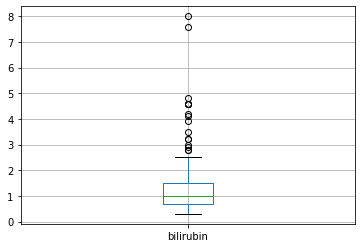

In [34]:
df.boxplot(column = 'bilirubin')

In [35]:
df['bilirubin'] = df['bilirubin'].fillna(df['bilirubin'].median())

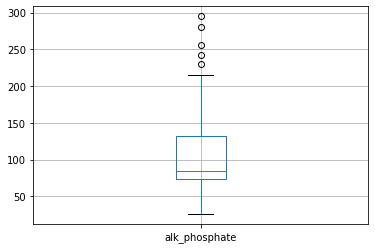

In [36]:
df.boxplot(column = 'alk_phosphate')

In [37]:
df['alk_phosphate'] = df['alk_phosphate'].fillna(df['alk_phosphate'].median())

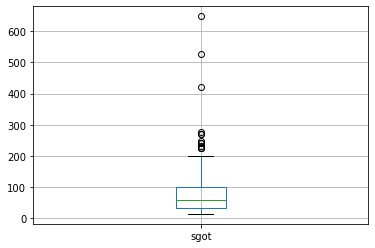

In [38]:
df.boxplot(column = 'sgot')

In [39]:
df['sgot'] = df['sgot'].fillna(df['sgot'].median())

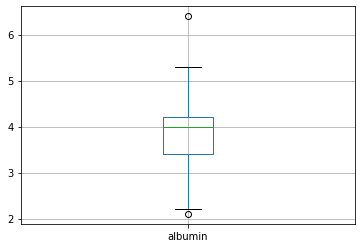

In [40]:
df.boxplot(column = 'albumin')

In [41]:
df['albumin'] = df['albumin'].fillna(df['albumin'].median())

In [42]:
df.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
histology          0
class              0
dtype: int64

### EXPLORATORY DATA ANALYSIS:

In [43]:
# 1) Univariate - Measure of Central tendency 
     # Distribution plot
    
#  2) Bivariate - correlation
     # joint plot
    
#  3) Multivariate - Dv HAS RELATION WITH 2 OR MORE THAN 2 IDV
     # pair plot

### Correlation Plot

In [44]:
# Correlation tells the linear relationship between two quantitative variables
# so we are making the numerical variables in another dataframe

In [45]:
numerical_df = df[['age','bilirubin','alk_phosphate','sgot','albumin']]

In [46]:
numerical_df.corr()

,age,bilirubin,alk_phosphate,sgot,albumin
age,1.000000,0.115205,0.017954,0.080267,-0.237422
bilirubin,0.115205,1.000000,0.133257,0.236464,-0.370526
alk_phosphate,0.017954,0.133257,1.000000,0.184426,-0.336258
sgot,0.080267,0.236464,0.184426,1.000000,-0.107613
albumin,-0.237422,-0.370526,-0.336258,-0.107613,1.000000


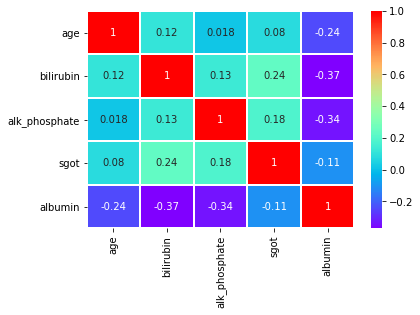

In [47]:
sns.heatmap(numerical_df.corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

In [48]:
##alk_phosphate and bilirubin are having -ve corr with albumin
##sgot is having +corr with bilirubin
##age is having -ve correlation with albumin

### Distribution plot

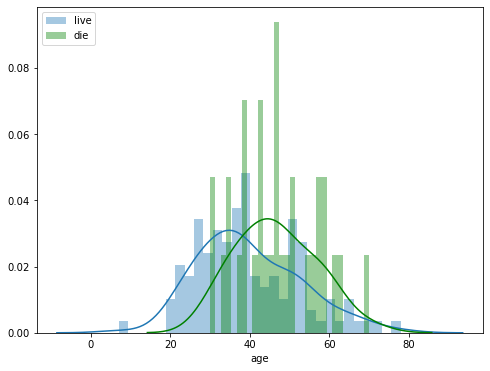

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df[(df['class']=='live')]['age'] ,bins= 30 , label = 'live')
sns.distplot(df[(df['class']=='die')]['age'] ,bins= 30 ,color='green' , label ='die')
plt.legend(loc='upper left')

In [50]:
### both the 'live' and 'die' follows the similar distribution and have the  high density between 30 to 60

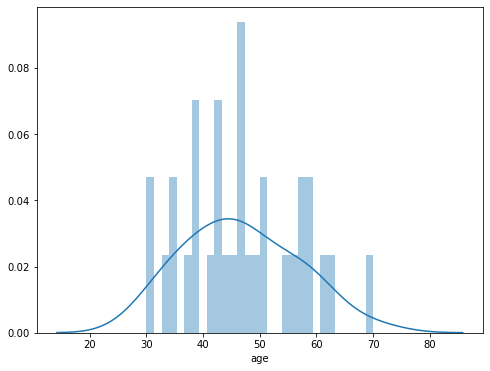

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(df[(df['class']=='die')]['age'] ,bins= 30 )

In [52]:
# This data tells that the patients died mostly in the age group between 40-50

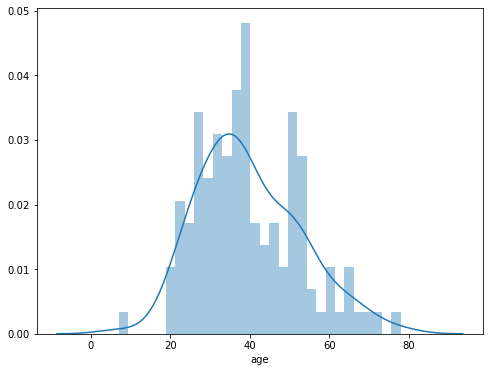

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(df[(df['class']=='live')]['age'] ,bins= 30 )

In [54]:
## patients who are living were present highly in between the age group of 30-40

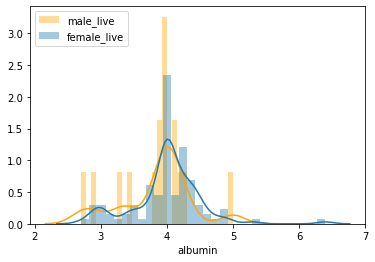

In [55]:
sns.distplot(df[(df['class']=='live') & (df['sex']=='male')]['albumin'] ,bins= 30 , color='orange',label = 'male_live')

sns.distplot(df[(df['class']=='live') & (df['sex']=='female')]['albumin'] ,bins= 30,label = 'female_live')

plt.legend(loc='upper left')

In [56]:
# the albumin level for men_live and women_live follows the same distribution

C:\Users\sathi\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


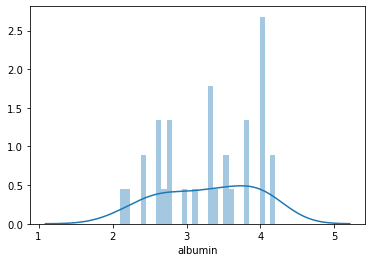

In [57]:
sns.distplot(df[(df['class']=='die') & (df['sex']=='male')]['albumin'] ,bins= 30 , color='orange')

sns.distplot(df[(df['class']=='die') & (df['sex']=='female')]['albumin'] ,bins= 30)


In [58]:
## no male die  
## only  female die when having less albumin level

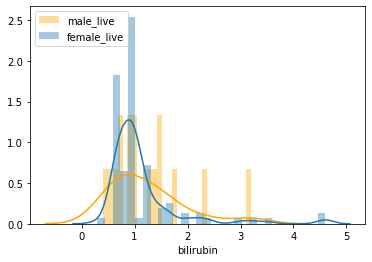

In [59]:
## bilirubin
sns.distplot(df[(df['class']=='live') & (df['sex']=='male')]['bilirubin'] ,bins= 30 , color='orange',label = 'male_live')

sns.distplot(df[(df['class']=='live') & (df['sex']=='female')]['bilirubin'] ,bins= 30,label = 'female_live')

plt.legend(loc='upper left')

In [60]:
### male_live and female_live follows the same distribution and having the high density between 0-2.

C:\Users\sathi\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


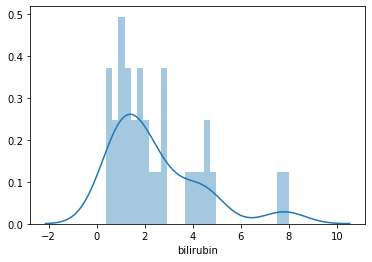

In [61]:
sns.distplot(df[(df['class']=='die') & (df['sex']=='male')]['bilirubin'] ,bins= 30 , color='orange')

sns.distplot(df[(df['class']=='die') & (df['sex']=='female')]['bilirubin'] ,bins= 30)


In [62]:
# only female die with bilirubin level between 1-3 in large quantity

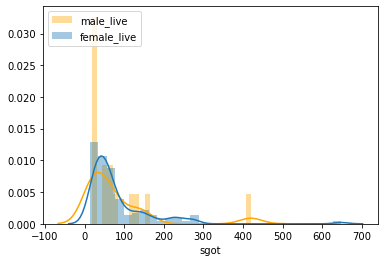

In [63]:
sns.distplot(df[(df['class']=='live') & (df['sex']=='male')]['sgot'] ,bins= 30 , color='orange',label = 'male_live')

sns.distplot(df[(df['class']=='live') & (df['sex']=='female')]['sgot'] ,bins= 30,label = 'female_live')

plt.legend(loc='upper left')

In [64]:
# both the live male and female follows the same distribution and having high density between 0 - 100.

C:\Users\sathi\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


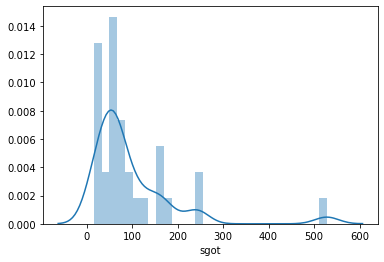

In [65]:
sns.distplot(df[(df['class']=='die') & (df['sex']=='male')]['sgot'] ,bins= 30 , color='orange')

sns.distplot(df[(df['class']=='die') & (df['sex']=='female')]['sgot'] ,bins= 30)


In [66]:
# majority of the  female having the sgot level less than 150 die

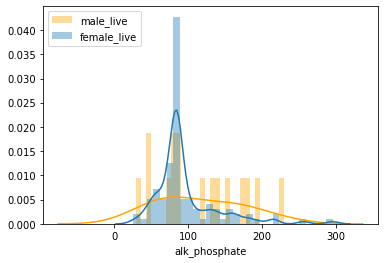

In [67]:
sns.distplot(df[(df['class']=='live') & (df['sex']=='male')]['alk_phosphate'] ,bins= 30 , color='orange',label = 'male_live')

sns.distplot(df[(df['class']=='live') & (df['sex']=='female')]['alk_phosphate'] ,bins= 30,label = 'female_live')

plt.legend(loc='upper left')

In [68]:
# both are having high density between 70-100.

C:\Users\sathi\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


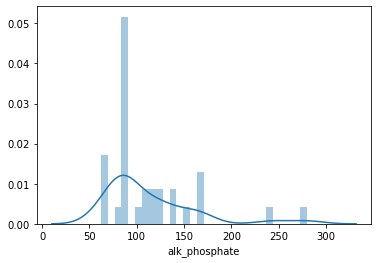

In [69]:
sns.distplot(df[(df['class']=='die') & (df['sex']=='male')]['alk_phosphate'] ,bins= 30 , color='orange')

sns.distplot(df[(df['class']=='die') & (df['sex']=='female')]['alk_phosphate'] ,bins= 30)

In [70]:
### majority of the  female with alk_phosphate level 80-90 die.

## Bivariate analysis

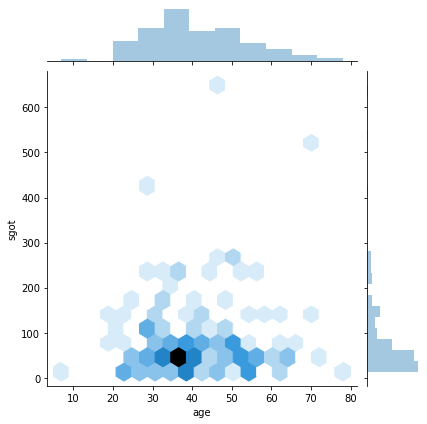

In [71]:
sns.jointplot(x='age',y='sgot',data=df,kind='hex')

In [72]:
# Sgot level above 50 for men and 45 for women is high and may indicate damage.



# This level increases significantly between the age group of 30 - 50 due to the extensive liver damage from toxins like alcohol or over-the-counter painkillers

## Multivariate Analysis

In [73]:
data = numerical_df.copy()

In [74]:
data.head()

,age,bilirubin,alk_phosphate,sgot,albumin
0,30,1.0,85.0,18.0,4.0
1,50,0.9,135.0,42.0,3.5
2,78,0.7,96.0,32.0,4.0
3,31,0.7,46.0,52.0,4.0
4,34,1.0,85.0,200.0,4.0


In [75]:
data['class'] = df['class']

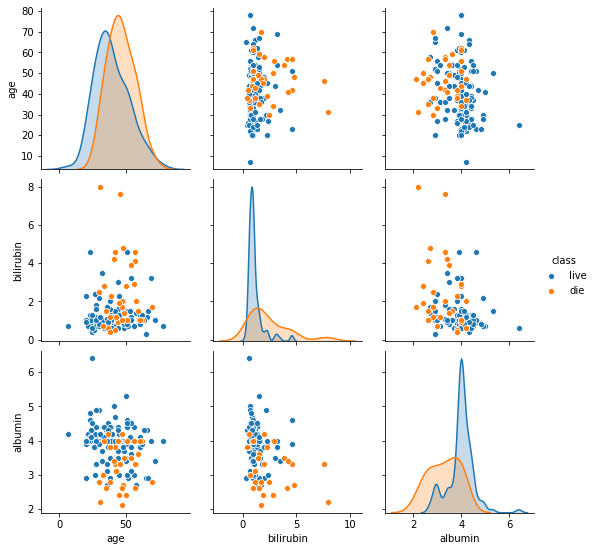

In [76]:
sns.pairplot(data,hue='class',vars=['age','bilirubin','albumin'])

In [77]:
#Most of the People with less bilirubin is surviving.

#Most of the people with high albumin is surviving.

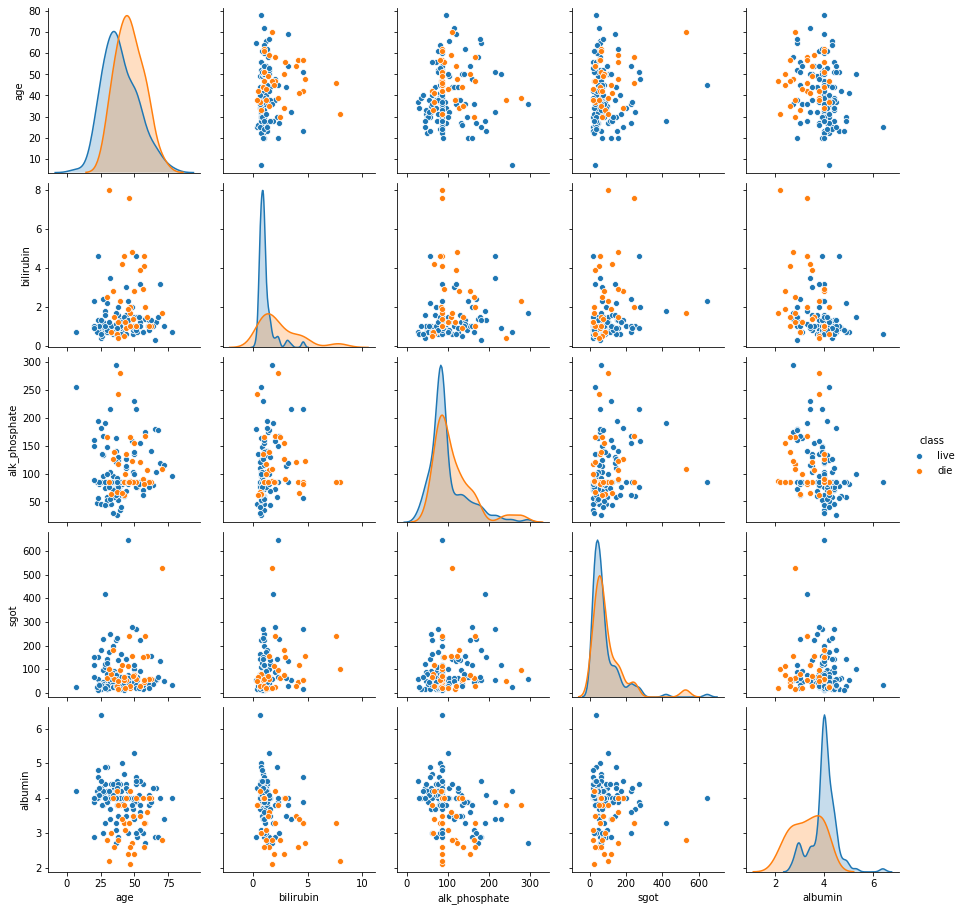

In [78]:
sns.pairplot(data,hue='class')

### Pie chart 

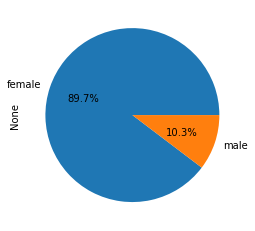

In [115]:
df.groupby('sex').size().plot(kind='pie', autopct='%.1f%%')

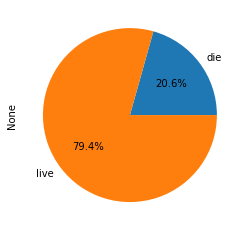

In [116]:
df.groupby('class').size().plot(kind='pie', autopct='%.1f%%')

### Barplot to get insights from categorical data

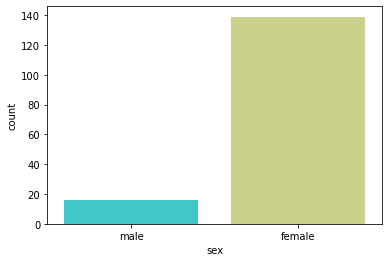

In [79]:
sns.countplot(x='sex',data=df , palette = 'rainbow')

In [80]:
# total no. of male is 16 and female is 139

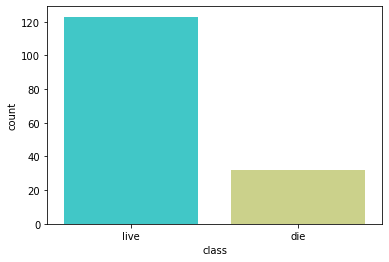

In [81]:
sns.countplot(x='class',data=df ,palette = 'rainbow')

In [82]:
#no. of patients live = 123 and die = 32

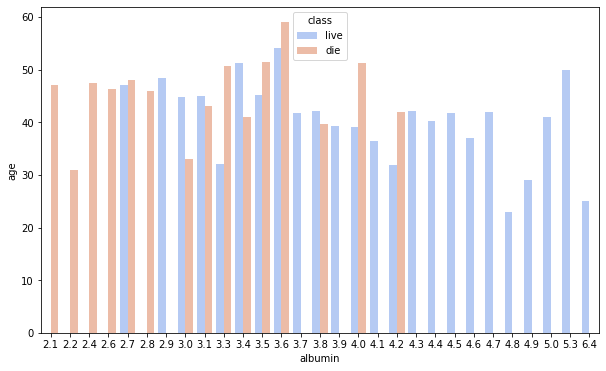

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(x='albumin',y= 'age',hue='class',data = df ,ci=None , palette = 'coolwarm')

In [84]:
## From this plot we can find that none of the people survived  with albumin value less 2.7 

## With albumin value greater than 4.3 less people has died.

In [85]:
df[(df['albumin']==2.4) & (df['class']=='die')]

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
127,50,female,True,False,True,False,False,True,True,True,False,True,True,2.8,155.0,75.0,2.4,True,die
144,45,female,True,False,True,True,True,True,False,False,True,True,False,1.9,85.0,114.0,2.4,True,die


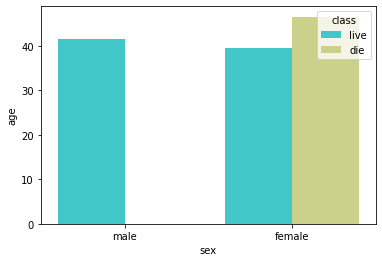

In [86]:

sns.barplot(x='sex',y= 'age',hue='class',data = df,ci=None , palette = 'rainbow')

In [87]:
## Records of male is very small and everyone is surviving with respect to this data.

## Female survival rate is less when the age increases.

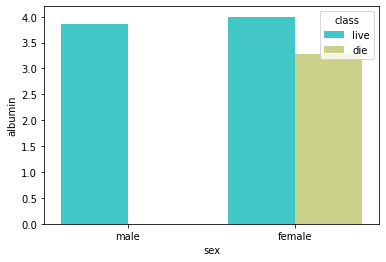

In [88]:

sns.barplot(x='sex',y= 'albumin',hue='class',data = df ,ci=None ,palette='rainbow')

In [89]:
## female with albumin level above 3.5 is live and leaa than 3.5 dies.

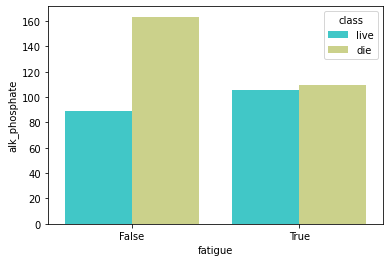

In [90]:
sns.barplot(x='fatigue',y= 'alk_phosphate',hue='class',data = df ,ci=None , palette = 'rainbow')

In [91]:
## Fatigue means physical and mental illness.

## We can observe that even if alk_phosphate level increases , it does not produces fatigue.

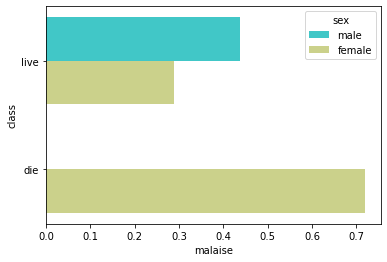

In [93]:
sns.barplot(x='malaise',y= 'class',hue= 'sex',data = df,ci=None  , palette = 'rainbow')

In [94]:
## Malaise causes the overall weakness and discomfort.

## Higher the malaise rate lesser the chance for  survival of the female.

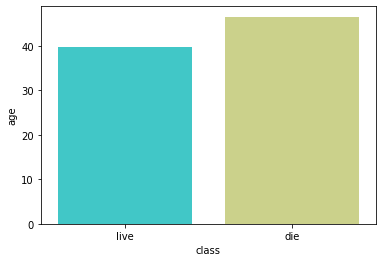

In [95]:
sns.barplot(x='class',y= 'age',data = df ,ci=None , palette = 'rainbow')

In [96]:
## Survival chance very less with respect to increase of age

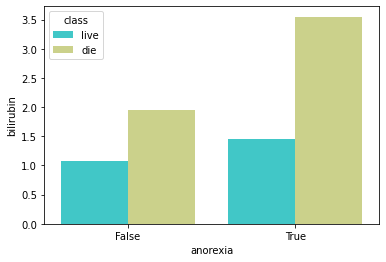

In [97]:
sns.barplot(x='anorexia',y= 'bilirubin',hue='class',data = df ,ci=None ,palette = 'rainbow')

In [98]:
## Anorexia means the desire to lose weight by refusing to eat.

## When the bilirubin is in high  levels then the patient might  get the symptoms of anorexia and dies.

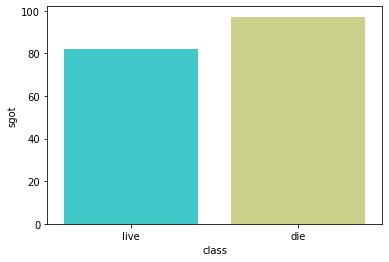

In [99]:
sns.barplot(x='class',y= 'sgot',data = df ,ci=None , palette = 'rainbow' )

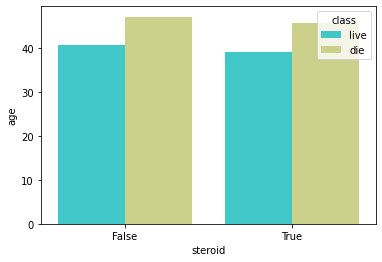

In [100]:
sns.barplot(x='steroid',y= 'age',hue='class',data = df ,ci=None ,palette='rainbow')

In [101]:
## The patients who uses the steroids does not shows any significant difference between the patients who does not uses the steroids.

## This graph shows the chance for survival is less for the age greater than 40.

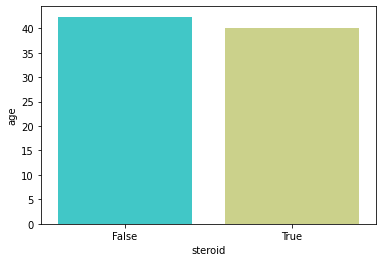

In [102]:
sns.barplot(x='steroid',y= 'age',data = df ,ci=None ,palette='rainbow')

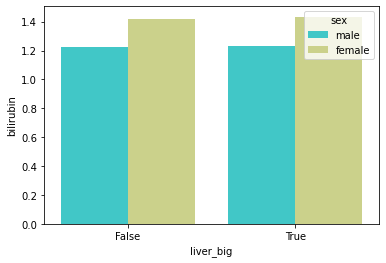

In [103]:
sns.barplot(x='liver_big',y= 'bilirubin',hue='sex',data = df ,ci=None ,palette = 'rainbow')

In [104]:
## change in size of the liver does not happen with respect to bilirubin

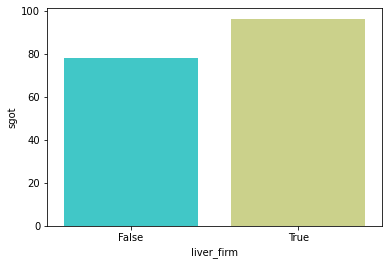

In [105]:
sns.barplot(x='liver_firm',y= 'sgot',data = df ,ci=None ,palette = 'rainbow')

In [106]:
## liver gets firm with increasing sgot level

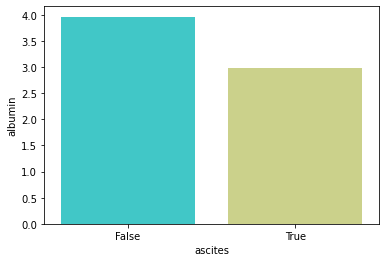

In [107]:
sns.barplot(x='ascites',y= 'albumin',data = df ,ci=None,palette = 'rainbow' )

In [108]:
### high albumin level low ascities

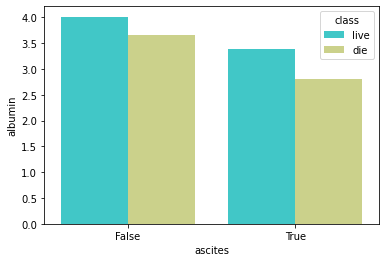

In [109]:
sns.barplot(x='ascites',y= 'albumin',hue='class',data = df ,ci=None,palette = 'rainbow' )

In [110]:
## Ascites means the complication of Hepatitis A Virus infection.

## With albumin value less than 3.5 the patients might get the complication of HAV infection.